Assignment 1

Dibuat Oleh : Fajri Sofianto
Tanggal : 17 Agustus 2023

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('D:\File_Analisa_Python\london_crime.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [4]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


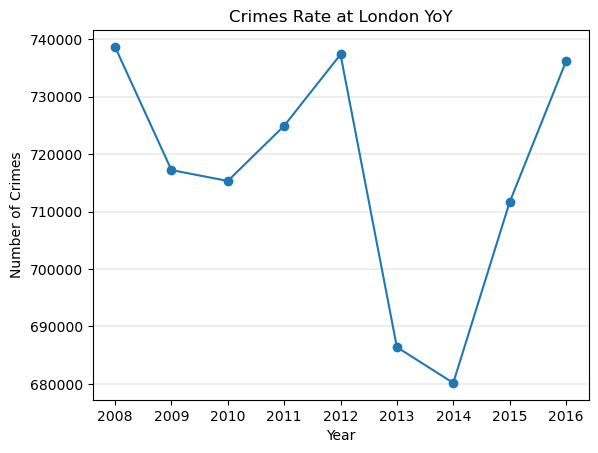

In [5]:
df_yearly = df[['year', 'value']]

df_yearly.groupby('year').sum('value').plot(marker = 'o',
                                            legend=False)
plt.ylabel('Number of Crimes')
plt.title('Crimes Rate at London YoY')
plt.xlabel('Year')
plt.grid(axis='y',
         linewidth =0.3)
plt.show()

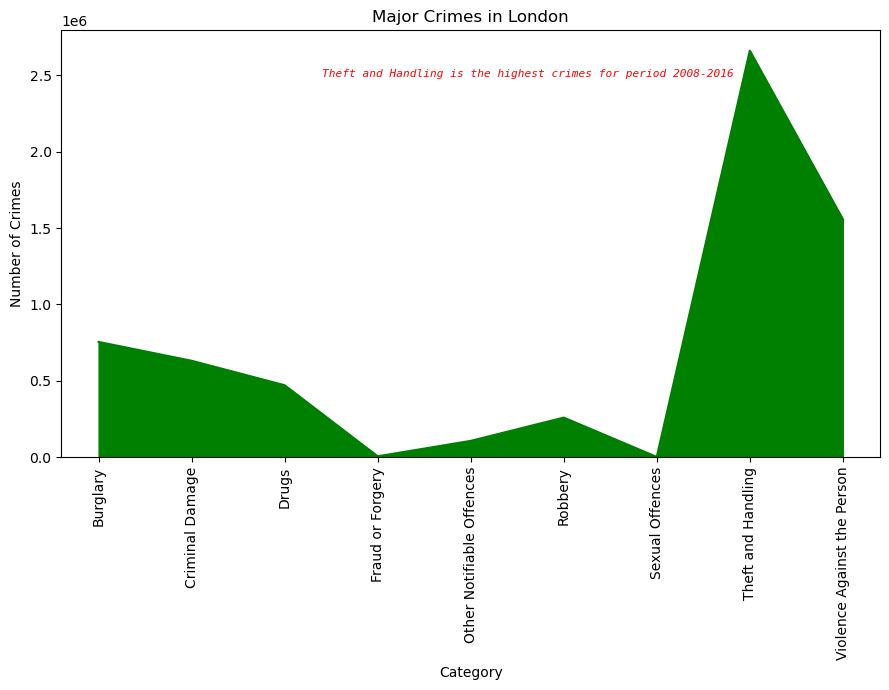

In [6]:
df_year_monthly = df[['major_category', 'value']]

df_year_monthly.groupby('major_category').sum('value').plot(kind='area',
                                                            legend=False,
                                                            color='green',
                                                            figsize=(9,7)
                                                            )
plt.ylabel('Number of Crimes')
plt.xlabel('Category')
plt.title('Major Crimes in London')
plt.xticks(rotation=90)
plt.text(2.4,2490000,'Theft and Handling is the highest crimes for period 2008-2016',
         fontsize=8,
         family='monospace',
         style='italic',
         color='red')
plt.tight_layout()
plt.show()

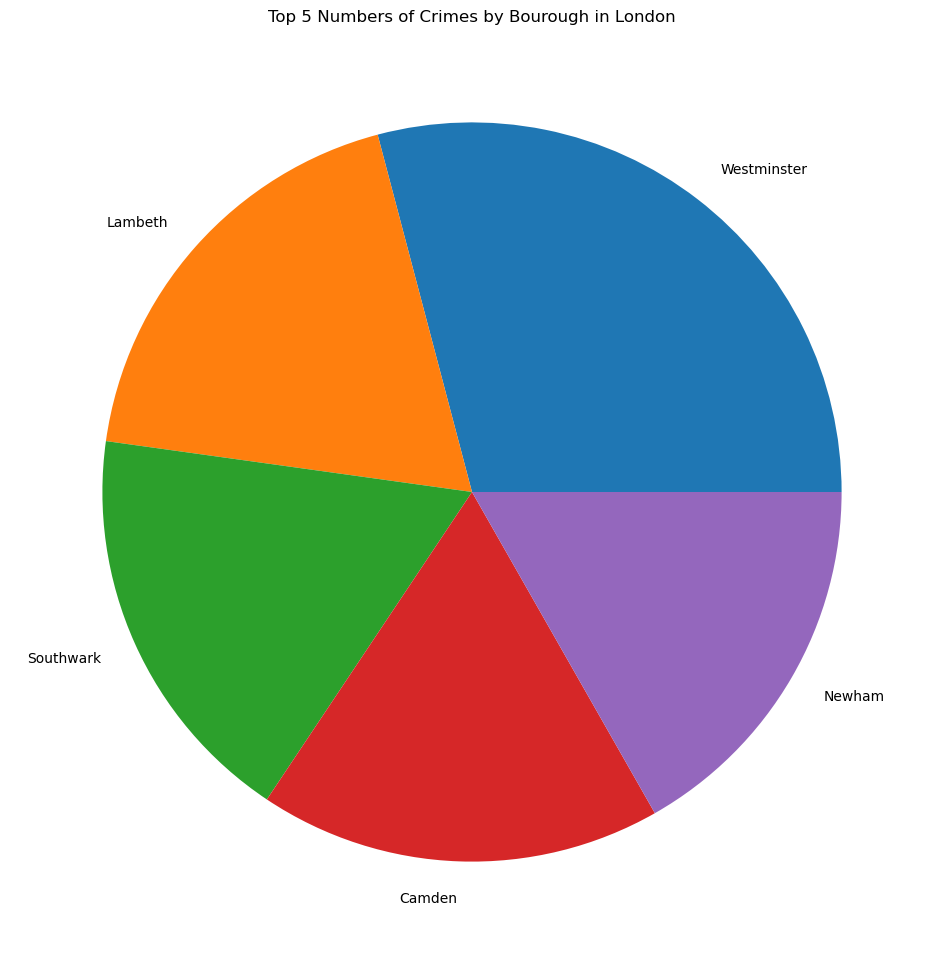

In [100]:
test = df[['borough','value']]

test = test.groupby('borough').sum('value')

pie = test.sort_values(by=('value'), ascending=False).head(5)

pie.plot.pie(y='value', figsize=(12,12), legend=False)
plt.ylabel('')
plt.title('Top 5 Numbers of Crimes by Bourough in London')
plt.show()